### **Importando as Bibliotecas**

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression, chi2
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import RobustScaler

from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

### **Objetivo: Analisar quais características da escola e da gestão escolar impacta na nota média de portugues do 5º ano na prova do SAEB**

# **Primeiro: REDUZIR A BASE**
    Selecionar apenas os dados referentes ao objetivo da análise, ou seja, apenas os dados da escola (localização, região, nome da escola, quantidade de salas, etc.), gestão escolar e a nota média de português do 5º ano.

In [ ]:
escolas = pd.read_csv("TS_ESCOLA.csv", encoding = "ISO-8859-1", engine='python')
escolas.head()

,ID_SAEB,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_AREA,ID_ESCOLA,ID_DEPENDENCIA_ADM,ID_LOCALIZACAO,PC_FORMACAO_DOCENTE_INICIAL,PC_FORMACAO_DOCENTE_FINAL,...,MEDIA_5EF_LP,MEDIA_5EF_MT,MEDIA_9EF_LP,MEDIA_9EF_MT,MEDIA_EMT_LP,MEDIA_EMT_MT,MEDIA_EMI_LP,MEDIA_EMI_MT,MEDIA_EM_LP,MEDIA_EM_MT
0,2019,1,11,1100015,2,11024666,3,2,100.0,64.4,...,184.83,210.37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,1,11,1100015,2,11024682,2,1,100.0,80.4,...,223.45,245.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,1,11,1100015,2,11024828,3,1,100.0,48.9,...,158.06,194.74,239.76,244.94,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,1,11,1100015,2,11024968,2,1,NaN,NaN,...,NaN,NaN,NaN,NaN,306.34,313.39,NaN,NaN,306.34,313.39
4,2019,1,11,1100015,2,11025077,3,1,100.0,29.5,...,173.45,180.18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
escolas.shape

(70606, 137)

In [ ]:
escolas.columns

Index(['ID_SAEB', 'ID_REGIAO', 'ID_UF', 'ID_MUNICIPIO', 'ID_AREA', 'ID_ESCOLA',
       'ID_DEPENDENCIA_ADM', 'ID_LOCALIZACAO', 'PC_FORMACAO_DOCENTE_INICIAL',
       'PC_FORMACAO_DOCENTE_FINAL',
       ...
       'MEDIA_5EF_LP', 'MEDIA_5EF_MT', 'MEDIA_9EF_LP', 'MEDIA_9EF_MT',
       'MEDIA_EMT_LP', 'MEDIA_EMT_MT', 'MEDIA_EMI_LP', 'MEDIA_EMI_MT',
       'MEDIA_EM_LP', 'MEDIA_EM_MT'],
      dtype='object', length=137)

In [ ]:
escolas = escolas.loc[:, ["ID_SAEB", "ID_REGIAO", "ID_UF", "ID_MUNICIPIO", "ID_AREA", "ID_ESCOLA",
                          "ID_DEPENDENCIA_ADM", "ID_LOCALIZACAO", "PC_FORMACAO_DOCENTE_INICIAL", 
                          "NIVEL_SOCIO_ECONOMICO", "NU_MATRICULADOS_CENSO_5EF", "NU_PRESENTES_5EF",
                          "TAXA_PARTICIPACAO_5EF", "MEDIA_5EF_LP"]]

#escolas = escolas.loc[:, ["ID_SAEB", "ID_REGIAO", "ID_UF", "ID_MUNICIPIO", "ID_AREA", "ID_ESCOLA",
#                          "ID_DEPENDENCIA_ADM", "ID_LOCALIZACAO", "PC_FORMACAO_DOCENTE_INICIAL", 
#                          "NIVEL_SOCIO_ECONOMICO", "NU_MATRICULADOS_CENSO_5EF", "NU_PRESENTES_5EF",
#                          "TAXA_PARTICIPACAO_5EF", "NIVEL_0_LP5", "NIVEL_1_LP5", "NIVEL_2_LP5",
#                          "NIVEL_3_LP5", "NIVEL_4_LP5", "NIVEL_5_LP5", "NIVEL_6_LP5", "NIVEL_7_LP5",
#                          "NIVEL_8_LP5", "NIVEL_9_LP5", "MEDIA_5EF_LP"]]

escolas.head()

,ID_SAEB,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_AREA,ID_ESCOLA,ID_DEPENDENCIA_ADM,ID_LOCALIZACAO,PC_FORMACAO_DOCENTE_INICIAL,NIVEL_SOCIO_ECONOMICO,NU_MATRICULADOS_CENSO_5EF,NU_PRESENTES_5EF,TAXA_PARTICIPACAO_5EF,MEDIA_5EF_LP
0,2019,1,11,1100015,2,11024666,3,2,100.0,Nível IV,22.0,18.0,0.818182,184.83
1,2019,1,11,1100015,2,11024682,2,1,100.0,Nível IV,156.0,149.0,0.955128,223.45
2,2019,1,11,1100015,2,11024828,3,1,100.0,Nível IV,19.0,21.0,1.105263,158.06
3,2019,1,11,1100015,2,11024968,2,1,NaN,Nível IV,NaN,NaN,NaN,NaN
4,2019,1,11,1100015,2,11025077,3,1,100.0,Nível IV,15.0,13.0,0.866667,173.45


In [ ]:
escolas.shape

(70606, 14)

In [ ]:
escolas.columns

Index(['ID_SAEB', 'ID_REGIAO', 'ID_UF', 'ID_MUNICIPIO', 'ID_AREA', 'ID_ESCOLA',
       'ID_DEPENDENCIA_ADM', 'ID_LOCALIZACAO', 'PC_FORMACAO_DOCENTE_INICIAL',
       'NIVEL_SOCIO_ECONOMICO', 'NU_MATRICULADOS_CENSO_5EF',
       'NU_PRESENTES_5EF', 'TAXA_PARTICIPACAO_5EF', 'MEDIA_5EF_LP'],
      dtype='object')

In [ ]:
escolas.dtypes

ID_SAEB                          int64
ID_REGIAO                        int64
ID_UF                            int64
ID_MUNICIPIO                     int64
ID_AREA                          int64
ID_ESCOLA                        int64
ID_DEPENDENCIA_ADM               int64
ID_LOCALIZACAO                   int64
PC_FORMACAO_DOCENTE_INICIAL    float64
NIVEL_SOCIO_ECONOMICO           object
NU_MATRICULADOS_CENSO_5EF      float64
NU_PRESENTES_5EF               float64
TAXA_PARTICIPACAO_5EF          float64
MEDIA_5EF_LP                   float64
dtype: object

In [ ]:
escolas.isnull().sum().sort_values(ascending=False)

MEDIA_5EF_LP                   28524
NU_MATRICULADOS_CENSO_5EF      24068
TAXA_PARTICIPACAO_5EF          24068
NU_PRESENTES_5EF               24007
PC_FORMACAO_DOCENTE_INICIAL    23219
NIVEL_SOCIO_ECONOMICO           1738
ID_SAEB                            0
ID_REGIAO                          0
ID_UF                              0
ID_MUNICIPIO                       0
ID_AREA                            0
ID_ESCOLA                          0
ID_DEPENDENCIA_ADM                 0
ID_LOCALIZACAO                     0
dtype: int64

# **Segundo: INTEGRAÇÃO**

In [ ]:
diretores = pd.read_csv("TS_DIRETOR.csv")
diretores.head()

,ID_SAEB,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_AREA,ID_ESCOLA,ID_DEPENDENCIA_ADM,ID_LOCALIZACAO,IN_PREENCHIMENTO_QUESTIONARIO,TX_RESP_Q001,...,TX_RESP_Q244,TX_RESP_Q245,TX_RESP_Q246,TX_RESP_Q247,TX_RESP_Q248,TX_RESP_Q249,TX_RESP_Q250,TX_RESP_Q251,TX_RESP_Q252,TX_RESP_Q253
0,2019,1,11,1100015,2,11024666,3,2,1,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D
1,2019,1,11,1100015,2,11024682,2,1,1,C,...,B,B,B,B,B,A,B,B,D,D
2,2019,1,11,1100015,2,11024828,3,1,1,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,C
3,2019,1,11,1100015,2,11024968,2,1,1,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D
4,2019,1,11,1100015,2,11025077,3,1,1,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C


In [ ]:
diretores.shape

(74176, 262)

In [ ]:
diretores.columns

Index(['ID_SAEB', 'ID_REGIAO', 'ID_UF', 'ID_MUNICIPIO', 'ID_AREA', 'ID_ESCOLA',
       'ID_DEPENDENCIA_ADM', 'ID_LOCALIZACAO', 'IN_PREENCHIMENTO_QUESTIONARIO',
       'TX_RESP_Q001',
       ...
       'TX_RESP_Q244', 'TX_RESP_Q245', 'TX_RESP_Q246', 'TX_RESP_Q247',
       'TX_RESP_Q248', 'TX_RESP_Q249', 'TX_RESP_Q250', 'TX_RESP_Q251',
       'TX_RESP_Q252', 'TX_RESP_Q253'],
      dtype='object', length=262)

In [ ]:
m = pd.merge(diretores, escolas, how = 'inner', on = ["ID_SAEB", "ID_REGIAO", "ID_UF", "ID_MUNICIPIO", "ID_AREA", "ID_ESCOLA", "ID_DEPENDENCIA_ADM", "ID_LOCALIZACAO"])
m.head()

,ID_SAEB,ID_REGIAO,ID_UF,ID_MUNICIPIO,ID_AREA,ID_ESCOLA,ID_DEPENDENCIA_ADM,ID_LOCALIZACAO,IN_PREENCHIMENTO_QUESTIONARIO,TX_RESP_Q001,...,TX_RESP_Q250,TX_RESP_Q251,TX_RESP_Q252,TX_RESP_Q253,PC_FORMACAO_DOCENTE_INICIAL,NIVEL_SOCIO_ECONOMICO,NU_MATRICULADOS_CENSO_5EF,NU_PRESENTES_5EF,TAXA_PARTICIPACAO_5EF,MEDIA_5EF_LP
0,2019,1,11,1100015,2,11024666,3,2,1,A,...,NaN,NaN,D,D,100.0,Nível IV,22.0,18.0,0.818182,184.83
1,2019,1,11,1100015,2,11024682,2,1,1,C,...,B,B,D,D,100.0,Nível IV,156.0,149.0,0.955128,223.45
2,2019,1,11,1100015,2,11024828,3,1,1,C,...,NaN,NaN,C,C,100.0,Nível IV,19.0,21.0,1.105263,158.06
3,2019,1,11,1100015,2,11024968,2,1,1,C,...,NaN,NaN,D,D,NaN,Nível IV,NaN,NaN,NaN,NaN
4,2019,1,11,1100015,2,11025077,3,1,1,C,...,NaN,NaN,B,C,100.0,Nível IV,15.0,13.0,0.866667,173.45


In [ ]:
m.shape

(71448, 268)

In [ ]:
m.columns

Index(['ID_SAEB', 'ID_REGIAO', 'ID_UF', 'ID_MUNICIPIO', 'ID_AREA', 'ID_ESCOLA',
       'ID_DEPENDENCIA_ADM', 'ID_LOCALIZACAO', 'IN_PREENCHIMENTO_QUESTIONARIO',
       'TX_RESP_Q001',
       ...
       'TX_RESP_Q250', 'TX_RESP_Q251', 'TX_RESP_Q252', 'TX_RESP_Q253',
       'PC_FORMACAO_DOCENTE_INICIAL', 'NIVEL_SOCIO_ECONOMICO',
       'NU_MATRICULADOS_CENSO_5EF', 'NU_PRESENTES_5EF',
       'TAXA_PARTICIPACAO_5EF', 'MEDIA_5EF_LP'],
      dtype='object', length=268)

In [ ]:
m.dtypes

ID_SAEB                        int64
ID_REGIAO                      int64
ID_UF                          int64
ID_MUNICIPIO                   int64
ID_AREA                        int64
                              ...   
NIVEL_SOCIO_ECONOMICO         object
NU_MATRICULADOS_CENSO_5EF    float64
NU_PRESENTES_5EF             float64
TAXA_PARTICIPACAO_5EF        float64
MEDIA_5EF_LP                 float64
Length: 268, dtype: object

In [ ]:
m.isnull().sum().sort_values(ascending=False)[0:20]

TX_RESP_Q076    65416
TX_RESP_Q077    65414
TX_RESP_Q067    61504
TX_RESP_Q062    61352
TX_RESP_Q058    61352
TX_RESP_Q059    61352
TX_RESP_Q060    61352
TX_RESP_Q061    61352
TX_RESP_Q063    61352
TX_RESP_Q066    61352
TX_RESP_Q064    61352
TX_RESP_Q065    61352
TX_RESP_Q168    57265
TX_RESP_Q171    57265
TX_RESP_Q170    57265
TX_RESP_Q169    57265
TX_RESP_Q174    57265
TX_RESP_Q167    57265
TX_RESP_Q173    57265
TX_RESP_Q172    57265
dtype: int64

# **Terceiro: Limpeza de Dados**

In [ ]:
def Limpeza(variavelAlvo, dataset):
    df = dataset.copy()

    # 1 - Remove colunas de IDs
    df.drop(["ID_SAEB", "ID_UF", "ID_MUNICIPIO", "ID_AREA", "ID_ESCOLA"], axis=1, inplace=True)

    # 1 - Remove todas as LINHAS que possui valores ausentes na coluna ALVO
    if (variavelAlvo != None):
        df.dropna(subset=[variavelAlvo], inplace=True)

    # 2 - Remove dados duplicados
    df.drop_duplicates(inplace=True)

    # 3 - Remove todas as COLUNAS que possui 30% ou mais de valores ausentes
    columns = df.drop([variavelAlvo], axis=1).columns.tolist()
    for index in columns:
        if df[index].isnull().sum() > ((df.shape[0] * 20) / 100):
            df.drop([index], axis=1, inplace=True)

    # 4 - Remove todas as LINHAS que possuem brancos, nulos e valores ausentes
    df.replace(".", np.nan)
    df.replace("*", np.nan)
    df.dropna(inplace=True)

    # 5 - Remove todas as COLUNAS que possuem apenas um rótulo
    columns = df.drop([variavelAlvo], axis=1).columns.tolist()
    for index in columns:
        if len(df[index].unique().tolist()) == 1:
            df.drop([index], axis=1, inplace=True)
    

    print(df.shape, "\n")

    print(df.isnull().sum().sort_values(ascending=False))

    return df

In [ ]:
m = Limpeza("MEDIA_5EF_LP", m)

(13836, 191) 

ID_REGIAO       0
TX_RESP_Q182    0
TX_RESP_Q165    0
TX_RESP_Q166    0
TX_RESP_Q175    0
               ..
TX_RESP_Q084    0
TX_RESP_Q085    0
TX_RESP_Q086    0
TX_RESP_Q087    0
MEDIA_5EF_LP    0
Length: 191, dtype: int64


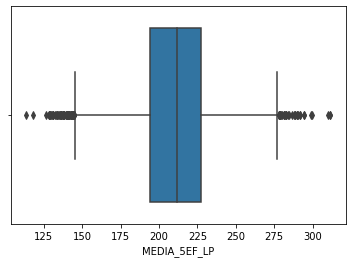

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6,4))
sns.boxplot(x=m["MEDIA_5EF_LP"])
plt.show()

# **Quarto: Transformação de Dados**

#### **Renomear o Nome das Variáveis**

#### **Codificação de Variáveis Categóricas**

In [ ]:
# Dividindo os dados em treino e teste
def dividirDataset(dataset):
    dataset_train, dataset_test = train_test_split(dataset, test_size=0.30, random_state=12)

    return dataset_train, dataset_test

In [ ]:
# Transforma variáveis categóricas
def codificar(dataset_train, dataset_test, classe):
    categorico_ordinal = OrdinalEncoder()
    categorico_nominal = OneHotEncoder(handle_unknown='ignore')
    scaler = LabelEncoder()
 
    if dataset_train[classe].dtype == object:
        target_train = dataset_train[classe]
        target_test = dataset_test[classe]

        dataset_train.drop([classe], axis=1, inplace=True)
        dataset_test.drop([classe], axis=1, inplace=True)

        lista = ["ID_REGIAO", "ID_DEPENDENCIA_ADM", "ID_LOCALIZACAO"]
        for index in lista:
            transformed_train = categorico_nominal.fit_transform(dataset_train[[index]].values).toarray()
            dataset_train[categorico_nominal.get_feature_names_out([index])] = transformed_train
            dataset_train.drop([index], axis=1, inplace=True)

            transformed_test = categorico_nominal.transform(dataset_test[[index]].values).toarray()
            dataset_test[categorico_nominal.get_feature_names_out([index])] = transformed_test
            dataset_test.drop([index], axis=1, inplace=True)

        columns = dataset_train.select_dtypes(include=['object']).columns.tolist()

        for index in columns:
            # Transforma variáveis categóricas NOMINAL
            if len(dataset_train[index].unique().tolist()) == 2:
                dataset_train[index] = dataset_train[index].replace(["A", "B"], [1, 0])
                dataset_test[index] = dataset_test[index].replace(["A", "B"], [1, 0])
            
            # Transforma variáveis categóricas NOMINAL
            elif len(dataset_train[index].unique().tolist()) == 3:
                transformed_train = categorico_nominal.fit_transform(dataset_train[[index]].values).toarray()
                dataset_train[categorico_nominal.get_feature_names_out([index])] = transformed_train
                dataset_train.drop([index], axis=1, inplace=True)

                transformed_test = categorico_nominal.transform(dataset_test[[index]].values).toarray()
                dataset_test[categorico_nominal.get_feature_names_out([index])] = transformed_test
                dataset_test.drop([index], axis=1, inplace=True)
            
            # Transforma variáveis categoricas ORDINAL
            elif len(dataset_train[index].unique().tolist()) >= 4:        
                dataset_train[index] = categorico_ordinal.fit_transform(dataset_train[[index]])
                dataset_test[index]  = categorico_ordinal.transform(dataset_test[[index]])
        
   
        target_train = scaler.fit_transform(target_train) 
        target_test = scaler.transform(target_test)

        dataset_train[classe] = target_train
        dataset_test[classe] = target_test

    else:
        lista = ["ID_REGIAO", "ID_DEPENDENCIA_ADM", "ID_LOCALIZACAO"]
        for index in lista:
            transformed_train = categorico_nominal.fit_transform(dataset_train[[index]].values).toarray()
            dataset_train[categorico_nominal.get_feature_names_out([index])] = transformed_train
            dataset_train.drop([index], axis=1, inplace=True)

            transformed_test = categorico_nominal.transform(dataset_test[[index]].values).toarray()
            dataset_test[categorico_nominal.get_feature_names_out([index])] = transformed_test
            dataset_test.drop([index], axis=1, inplace=True)
            
        columns = dataset_train.select_dtypes(include=['object']).columns.tolist()

        for index in columns:
            # Transforma variáveis categóricas NOMINAL
            if len(dataset_train[index].unique().tolist()) == 2:
                dataset_train[index] = dataset_train[index].replace(["A", "B"], [1, 0])
                dataset_test[index] = dataset_test[index].replace(["A", "B"], [1, 0])
            
            # Transforma variáveis categóricas NOMINAL
            elif len(dataset_train[index].unique().tolist()) == 3:
                transformed_train = categorico_nominal.fit_transform(dataset_train[[index]].values).toarray()
                dataset_train[categorico_nominal.get_feature_names_out([index])] = transformed_train
                dataset_train.drop([index], axis=1, inplace=True)

                transformed_test = categorico_nominal.transform(dataset_test[[index]].values).toarray()
                dataset_test[categorico_nominal.get_feature_names_out([index])] = transformed_test
                dataset_test.drop([index], axis=1, inplace=True)
            
            # Transforma variáveis categoricas ORDINAL
            elif len(dataset_train[index].unique().tolist()) >= 4:        
                dataset_train[index] = categorico_ordinal.fit_transform(dataset_train[[index]])
                dataset_test[index]  = categorico_ordinal.transform(dataset_test[[index]])
        

    return dataset_train, dataset_test

#### **Padronização de Dados**

In [ ]:
# Transforma a escala dos dados
def padronizar(dataset_train, dataset_test):
    features = dataset_train.columns.tolist()

    scaler = MinMaxScaler()
    #scaler = StandardScaler()
    #scaler = PowerTransformer(method="yeo-johnson")
    #scaler = RobustScaler()

    dataset_train = scaler.fit_transform(dataset_train)
    dataset_test  = scaler.transform(dataset_test) 

    dataset_train = pd.DataFrame(dataset_train, columns=features)
    dataset_test = pd.DataFrame(dataset_test, columns=features)

    return dataset_train, dataset_test

In [ ]:
def transformer(dataset, classe):
    
    # Dividindo os dados em treino e teste
    dataset_train, dataset_test = dividirDataset(dataset)
    
    # Transforma as variáveis categóricas
    dataset_train, dataset_test = codificar(dataset_train, dataset_test, classe)

    # Padronizar os dados
    dataset_train, dataset_test = padronizar(dataset_train, dataset_test)

    return dataset_train, dataset_test

# Informe o dataset e o nome da classe ALVO
dataset_train, dataset_test = transformer(m, "MEDIA_5EF_LP")

In [ ]:
dataset_train.shape, dataset_test.shape

((9685, 230), (4151, 230))

In [ ]:
dataset_train.head()

,TX_RESP_Q001,TX_RESP_Q002,TX_RESP_Q004,TX_RESP_Q006,TX_RESP_Q008,TX_RESP_Q009,TX_RESP_Q010,TX_RESP_Q011,TX_RESP_Q012,TX_RESP_Q013,...,TX_RESP_Q162_C,TX_RESP_Q163_A,TX_RESP_Q163_B,TX_RESP_Q163_C,TX_RESP_Q164_A,TX_RESP_Q164_B,TX_RESP_Q164_C,TX_RESP_Q165_A,TX_RESP_Q165_B,TX_RESP_Q165_C
0,0.0,0.428571,0.085714,0.088235,0.571429,0.571429,0.571429,0.100000,0.10,0.100000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.4,0.428571,0.114286,0.058824,0.428571,0.285714,0.285714,0.033333,0.05,0.033333,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.914286,0.028571,0.029412,0.571429,0.571429,0.571429,0.100000,0.15,0.100000,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.4,0.257143,0.485714,0.441176,0.971429,0.857143,0.571429,0.033333,0.05,0.033333,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.4,0.457143,0.314286,0.323529,0.571429,0.571429,0.571429,0.100000,0.20,0.133333,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
import scipy.stats as stats

shapiro_test = stats.shapiro(dataset_train["MEDIA_5EF_LP"])
print(round(shapiro_test.statistic, 2), round(shapiro_test.pvalue, 2))

if shapiro_test.pvalue > 0.05:
    print("Com 95% de confiança, os dados são similares a uma distribuição normal")
else:
    print("Com 95% de confiança, os dados NÃO são similares a uma distribuição normal")


media = np.mean(dataset_train["MEDIA_5EF_LP"])
std = np.std(dataset_train["MEDIA_5EF_LP"])

ks_test = stats.kstest(dataset_train["MEDIA_5EF_LP"], cdf='norm', args=(media, std), N = len(dataset_train["MEDIA_5EF_LP"]))
print(round(ks_test.statistic, 2), round(ks_test.pvalue, 2))

# Hipotese Nula (H0): Os dados seguem uma distribuição normal
# Hipotese Alternativa (H1): Os dados não seguem uma distribuição normal
# alpha = 0.05 => É o nível de significância, isto é, a probabilidade de rejeitarmos a hipótese nula quando ela é verdadeira.
# Se p_value >= alpha => não rejeita a hipotese nula
# Se p_value < alpha  => rejeita a hitopose nula 

if ks_test.pvalue >= 0.05:
    print("Com 95% de confiança, os dados são similares a uma distribuição normal")
else:
    print("Com 95% de confiança, os dados NÃO são similares a uma distribuição normal")


ad_test = stats.anderson(dataset_train["MEDIA_5EF_LP"])
print(round(ad_test.statistic, 2), ad_test.critical_values, ad_test.significance_level)

if round(ad_test.statistic, 2) < ad_test.critical_values[2]:
    print("Com " + str(100 - ad_test.significance_level[2]) + "% de confiança, os dados são similares a uma distribuição normal")
else: 
    print("Com " + str(100 - ad_test.significance_level[2]) + "% de confiança, os dados NÃO são similares a uma distribuição normal")

0.99 0.0
Com 95% de confiança, os dados NÃO são similares a uma distribuição normal
0.03 0.0
Com 95% de confiança, os dados NÃO são similares a uma distribuição normal
17.2 [0.576 0.656 0.787 0.918 1.092] [15.  10.   5.   2.5  1. ]
Com 95.0% de confiança, os dados NÃO são similares a uma distribuição normal


### **Separar as Variáveis da Classe Alvo**

In [ ]:
def separarDados(dataset_train, dataset_test, classe):
    X_train = dataset_train.drop([classe], axis=1)
    y_train = dataset_train[classe]

    X_test = dataset_test.drop([classe], axis=1)
    y_test = dataset_test[classe]

    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test = separarDados(dataset_train, dataset_test, "MEDIA_5EF_LP")

print(X_train.shape, X_test.shape)

(9685, 229) (4151, 229)


In [ ]:
# cada modelo vai ter um K diferente

# o que faz o metodo de filtagrem não ser tao bom quando o wrapper
# a seleção é feita de forma independente
# solução rápida e simples

# **Primeiro: REDUZIR A BASE**

    Usar algoritmo para selecionar as variáveis mais relevantes.

#### **Filtro**

In [ ]:
select = SelectKBest(f_regression, k=30) # a desvantagem é que tem que informar o número de k

X_train_ = select.fit_transform(X_train, y_train)
X_test_ = select.transform(X_test)

features_mask = select.get_support(True)
print(features_mask)

X_train.iloc[:, features_mask].columns

[  0  54  60  65  67  68  69  70  71  72  74  75  80  81  84  91  96  99
 100 114 152 166 167 169 171 172 173 174 179 180]


Index(['TX_RESP_Q001', 'TX_RESP_Q083', 'TX_RESP_Q089', 'TX_RESP_Q094',
       'TX_RESP_Q096', 'TX_RESP_Q097', 'TX_RESP_Q098', 'TX_RESP_Q099',
       'TX_RESP_Q100', 'TX_RESP_Q101', 'TX_RESP_Q103', 'TX_RESP_Q104',
       'TX_RESP_Q131', 'TX_RESP_Q133', 'TX_RESP_Q137', 'TX_RESP_Q144',
       'TX_RESP_Q150', 'TX_RESP_Q153', 'TX_RESP_Q154', 'TX_RESP_Q184',
       'TX_RESP_Q222', 'PC_FORMACAO_DOCENTE_INICIAL', 'NIVEL_SOCIO_ECONOMICO',
       'NU_PRESENTES_5EF', 'ID_REGIAO_1', 'ID_REGIAO_2', 'ID_REGIAO_3',
       'ID_REGIAO_4', 'ID_LOCALIZACAO_1', 'ID_LOCALIZACAO_2'],
      dtype='object')

In [ ]:
select = SelectKBest(mutual_info_regression, k=30) # a desvantagem é que tem que informar o número de k

X_train_ = select.fit_transform(X_train, y_train)
X_test_ = select.transform(X_test)

features_mask = select.get_support(True)
print(features_mask)

X_train.iloc[:, features_mask].columns

[  0  30  54  60  65  67  68  70  71  72  74  80  81  91  99 104 114 130
 132 152 166 167 168 169 171 172 173 174 179 180]


Index(['TX_RESP_Q001', 'TX_RESP_Q035', 'TX_RESP_Q083', 'TX_RESP_Q089',
       'TX_RESP_Q094', 'TX_RESP_Q096', 'TX_RESP_Q097', 'TX_RESP_Q099',
       'TX_RESP_Q100', 'TX_RESP_Q101', 'TX_RESP_Q103', 'TX_RESP_Q131',
       'TX_RESP_Q133', 'TX_RESP_Q144', 'TX_RESP_Q153', 'TX_RESP_Q166',
       'TX_RESP_Q184', 'TX_RESP_Q200', 'TX_RESP_Q202', 'TX_RESP_Q222',
       'PC_FORMACAO_DOCENTE_INICIAL', 'NIVEL_SOCIO_ECONOMICO',
       'NU_MATRICULADOS_CENSO_5EF', 'NU_PRESENTES_5EF', 'ID_REGIAO_1',
       'ID_REGIAO_2', 'ID_REGIAO_3', 'ID_REGIAO_4', 'ID_LOCALIZACAO_1',
       'ID_LOCALIZACAO_2'],
      dtype='object')

### **Wrapper**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE

model = DecisionTreeRegressor(random_state=42)

rfe = RFE(estimator=model, n_features_to_select=30, step=1)

fit = rfe.fit(X_train, y_train)

features_mask = select.get_support(True)
print(features_mask)

X_train.iloc[:, features_mask].columns

[  0  30  54  60  65  67  68  70  71  72  74  80  81  91  99 104 114 130
 132 152 166 167 168 169 171 172 173 174 179 180]


Index(['TX_RESP_Q001', 'TX_RESP_Q035', 'TX_RESP_Q083', 'TX_RESP_Q089',
       'TX_RESP_Q094', 'TX_RESP_Q096', 'TX_RESP_Q097', 'TX_RESP_Q099',
       'TX_RESP_Q100', 'TX_RESP_Q101', 'TX_RESP_Q103', 'TX_RESP_Q131',
       'TX_RESP_Q133', 'TX_RESP_Q144', 'TX_RESP_Q153', 'TX_RESP_Q166',
       'TX_RESP_Q184', 'TX_RESP_Q200', 'TX_RESP_Q202', 'TX_RESP_Q222',
       'PC_FORMACAO_DOCENTE_INICIAL', 'NIVEL_SOCIO_ECONOMICO',
       'NU_MATRICULADOS_CENSO_5EF', 'NU_PRESENTES_5EF', 'ID_REGIAO_1',
       'ID_REGIAO_2', 'ID_REGIAO_3', 'ID_REGIAO_4', 'ID_LOCALIZACAO_1',
       'ID_LOCALIZACAO_2'],
      dtype='object')

#### **Embedded**

In [ ]:
ml = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
ml.fit(X_train, y_train)

y_pred = ml.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(round(mae, 2))
print(round(r2, 2)) #robust 0.46 #power 0.45 s0.46

0.07
0.46


In [ ]:
feature_importance = pd.DataFrame(ml.feature_importances_, index=X_train.columns, columns=["Importância"]).sort_values(by=["Importância"], ascending=False)
feature_importance = feature_importance.iloc[0:10,:]
feature_importance

,Importância
NIVEL_SOCIO_ECONOMICO,0.359567
TAXA_PARTICIPACAO_5EF,0.045398
PC_FORMACAO_DOCENTE_INICIAL,0.032278
TX_RESP_Q002,0.015853
NU_MATRICULADOS_CENSO_5EF,0.015517
NU_PRESENTES_5EF,0.014861
TX_RESP_Q006,0.012514
ID_REGIAO_1,0.012482
TX_RESP_Q202,0.012374
TX_RESP_Q004,0.011907


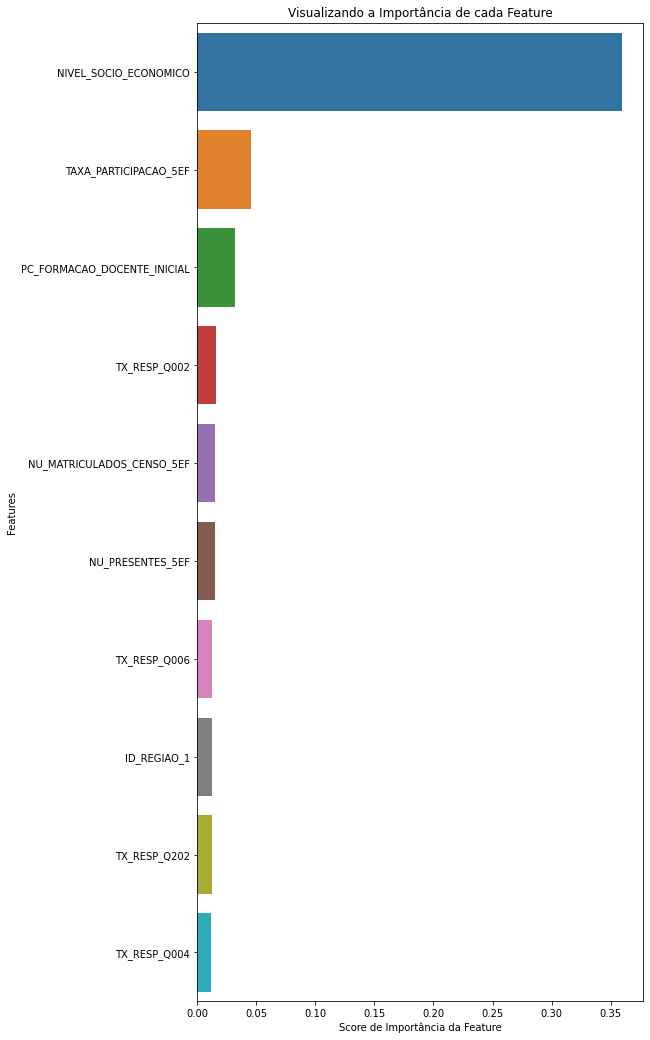

In [ ]:
feature_imp = pd.Series(ml.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_imp = feature_imp[0:10]

fig = plt.figure(figsize=(8,18))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Score de Importância da Feature')
plt.ylabel('Features')
plt.title("Visualizando a Importância de cada Feature")
plt.show()

In [ ]:
# Redução - Seleciona as Features mais Relevantes

k_score = []

for k in range(2, X_train.shape[1]):

    select = SelectKBest(f_regression, k=k)

    X_train_ = select.fit_transform(X_train, y_train)
    X_test_ = select.transform(X_test)

    features_mask = select.get_support(True)
    X_trainII = X_train.iloc[:, features_mask]
    X_testII = X_test.iloc[:, features_mask]

    ml = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
    ml.fit(X_trainII, y_train)

    y_pred = ml.predict(X_testII)

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    k_score.append([k,round(mae, 2), round(r2, 2)])

    print(k, round(mae, 2), round(r2, 2))


2 0.07 0.37
3 0.07 0.38
4 0.07 0.39
5 0.07 0.39
6 0.07 0.39
7 0.07 0.39
8 0.07 0.39
9 0.07 0.39
10 0.08 0.26
11 0.08 0.27
12 0.08 0.26
13 0.08 0.27
14 0.08 0.29
15 0.08 0.29
16 0.08 0.31
17 0.08 0.31
18 0.08 0.33
19 0.08 0.34
20 0.08 0.34
21 0.08 0.35
22 0.08 0.35
23 0.08 0.35
24 0.08 0.36
25 0.07 0.38
26 0.07 0.38
27 0.07 0.38
28 0.07 0.38
29 0.07 0.38
30 0.07 0.39
31 0.07 0.39
32 0.07 0.39
33 0.07 0.39
34 0.07 0.4
35 0.07 0.4
36 0.07 0.41
37 0.07 0.42
38 0.07 0.42
39 0.07 0.43
40 0.07 0.43
41 0.07 0.43
42 0.07 0.43
43 0.07 0.43
44 0.07 0.43
45 0.07 0.43
46 0.07 0.43
47 0.07 0.43
48 0.07 0.43
49 0.07 0.43
50 0.07 0.43
51 0.07 0.43
52 0.07 0.44
53 0.07 0.44
54 0.07 0.44
55 0.07 0.44
56 0.07 0.44
57 0.07 0.44
58 0.07 0.44
59 0.07 0.44
60 0.07 0.44
61 0.07 0.44
62 0.07 0.44
63 0.07 0.44
64 0.07 0.44
65 0.07 0.46
66 0.07 0.46
67 0.07 0.45
68 0.07 0.45
69 0.07 0.45
70 0.07 0.45
71 0.07 0.45
72 0.07 0.45
73 0.07 0.45
74 0.07 0.45
75 0.07 0.45
76 0.07 0.45
77 0.07 0.45
78 0.07 0.45
79 0.07 0

In [ ]:
k_score = sorted(k_score, key= lambda item : item[2], reverse=True)
k_score

[[65, 0.07, 0.46],
 [66, 0.07, 0.46],
 [104, 0.07, 0.46],
 [105, 0.07, 0.46],
 [106, 0.07, 0.46],
 [113, 0.07, 0.46],
 [114, 0.07, 0.46],
 [117, 0.07, 0.46],
 [132, 0.07, 0.46],
 [138, 0.07, 0.46],
 [139, 0.07, 0.46],
 [141, 0.07, 0.46],
 [142, 0.07, 0.46],
 [145, 0.07, 0.46],
 [147, 0.07, 0.46],
 [148, 0.07, 0.46],
 [149, 0.07, 0.46],
 [150, 0.07, 0.46],
 [151, 0.07, 0.46],
 [152, 0.07, 0.46],
 [153, 0.07, 0.46],
 [154, 0.07, 0.46],
 [155, 0.07, 0.46],
 [156, 0.07, 0.46],
 [160, 0.07, 0.46],
 [161, 0.07, 0.46],
 [162, 0.07, 0.46],
 [163, 0.07, 0.46],
 [164, 0.07, 0.46],
 [165, 0.07, 0.46],
 [166, 0.07, 0.46],
 [168, 0.07, 0.46],
 [169, 0.07, 0.46],
 [170, 0.07, 0.46],
 [171, 0.07, 0.46],
 [172, 0.07, 0.46],
 [173, 0.07, 0.46],
 [174, 0.07, 0.46],
 [175, 0.07, 0.46],
 [176, 0.07, 0.46],
 [177, 0.07, 0.46],
 [178, 0.07, 0.46],
 [179, 0.07, 0.46],
 [180, 0.07, 0.46],
 [181, 0.07, 0.46],
 [183, 0.07, 0.46],
 [184, 0.07, 0.46],
 [185, 0.07, 0.46],
 [186, 0.07, 0.46],
 [187, 0.07, 0.46],
 [

In [ ]:
# Quanto menor for o score (o erro de predição), melhor será o modelo
pd.DataFrame(k_score, columns=["k", "mae", "r2"]).sort_values(by=["r2"], ascending=False)

,k,mae,r2
0,65,0.07,0.46
44,181,0.07,0.46
65,203,0.07,0.46
64,202,0.07,0.46
63,201,0.07,0.46
...,...,...,...
222,15,0.08,0.29
223,11,0.08,0.27
224,13,0.08,0.27
225,10,0.08,0.26


In [ ]:
select = SelectKBest(f_regression, k=k_score[0][0])

X_train_ = select.fit_transform(X_train, y_train)
X_test_ = select.transform(X_test)

features_mask = select.get_support(True)
print(features_mask)

names_features = X_train.iloc[:, features_mask].columns
names_features

[  0  32  33  37  40  49  51  52  53  54  57  60  64  65  67  68  69  70
  71  72  74  75  78  80  81  84  91  92  93  96  97  98  99 100 101 104
 108 114 116 117 118 119 130 132 133 135 144 147 148 152 162 164 165 166
 167 168 169 170 171 172 173 174 179 180 205]


Index(['TX_RESP_Q001', 'TX_RESP_Q037', 'TX_RESP_Q041', 'TX_RESP_Q045',
       'TX_RESP_Q048', 'TX_RESP_Q057', 'TX_RESP_Q080', 'TX_RESP_Q081',
       'TX_RESP_Q082', 'TX_RESP_Q083', 'TX_RESP_Q086', 'TX_RESP_Q089',
       'TX_RESP_Q093', 'TX_RESP_Q094', 'TX_RESP_Q096', 'TX_RESP_Q097',
       'TX_RESP_Q098', 'TX_RESP_Q099', 'TX_RESP_Q100', 'TX_RESP_Q101',
       'TX_RESP_Q103', 'TX_RESP_Q104', 'TX_RESP_Q107', 'TX_RESP_Q131',
       'TX_RESP_Q133', 'TX_RESP_Q137', 'TX_RESP_Q144', 'TX_RESP_Q145',
       'TX_RESP_Q147', 'TX_RESP_Q150', 'TX_RESP_Q151', 'TX_RESP_Q152',
       'TX_RESP_Q153', 'TX_RESP_Q154', 'TX_RESP_Q155', 'TX_RESP_Q166',
       'TX_RESP_Q178', 'TX_RESP_Q184', 'TX_RESP_Q186', 'TX_RESP_Q187',
       'TX_RESP_Q188', 'TX_RESP_Q189', 'TX_RESP_Q200', 'TX_RESP_Q202',
       'TX_RESP_Q203', 'TX_RESP_Q205', 'TX_RESP_Q214', 'TX_RESP_Q217',
       'TX_RESP_Q218', 'TX_RESP_Q222', 'TX_RESP_Q232', 'TX_RESP_Q252',
       'TX_RESP_Q253', 'PC_FORMACAO_DOCENTE_INICIAL', 'NIVEL_SOCIO_ECONOMICO'

In [ ]:
# Quanto maior for o score, mais significativa é a variável
pd.DataFrame(select.scores_, index=X_train.columns, columns=["Scores"]).sort_values(by=["Scores"], ascending=False).head()

,Scores
NIVEL_SOCIO_ECONOMICO,5388.687693
ID_REGIAO_2,1400.404352
ID_REGIAO_3,878.016284
TX_RESP_Q001,861.319927
ID_LOCALIZACAO_2,786.632187


In [ ]:
pd.DataFrame(select.pvalues_, index=X_train.columns, columns=["pvalue"]).sort_values(by=["pvalue"], ascending=True).head()

,pvalue
NIVEL_SOCIO_ECONOMICO,0.000000e+00
ID_REGIAO_2,2.186348e-286
ID_REGIAO_3,8.798559e-185
TX_RESP_Q001,1.883672e-181
ID_LOCALIZACAO_2,1.735988e-166


In [ ]:
X_trainII = X_train.iloc[:, features_mask]
X_testII = X_test.iloc[:, features_mask]

ml = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=42)
ml.fit(X_trainII, y_train)

y_pred = ml.predict(X_testII)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(round(mae, 2), round(r2, 2))

0.07 0.46


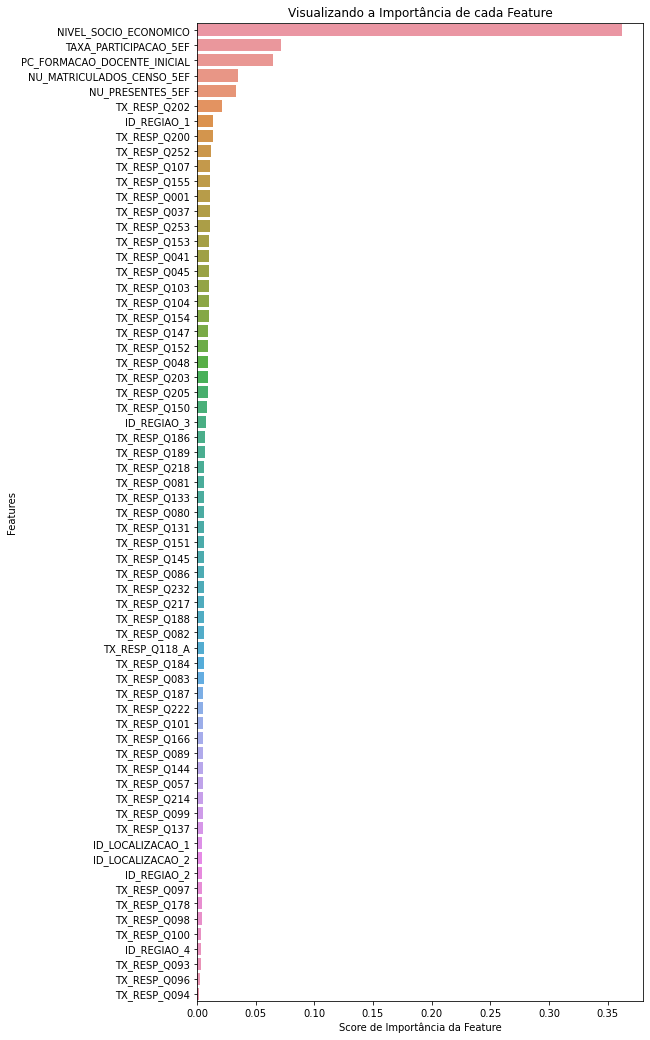

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#features_ = dataset_train.drop(["MEDIA_5EF_LP"], axis=1)
#features_ = features_.columns[features_mask].tolist()


feature_imp = pd.Series(ml.feature_importances_, index=names_features).sort_values(ascending=False)

fig = plt.figure(figsize=(8,18))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Score de Importância da Feature')
plt.ylabel('Features')
plt.title("Visualizando a Importância de cada Feature")
plt.show()

In [ ]:
#reduzir  => limpar => integrar => limpar => reduzir
#esse é melhor

In [ ]:
# reduzir => integrar => reduzir => limpar